In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


In [3]:
# Download latest version of datasets from kaggle
path = kagglehub.dataset_download("mcdonalds/nutrition-facts")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 7.37k/7.37k [00:00<00:00, 2.51MB/s]

Extracting files...
Path to dataset files: C:\Users\Ishwari kafle\.cache\kagglehub\datasets\mcdonalds\nutrition-facts\versions\1


In [10]:
data = pd.read_csv('../data/menu.csv')
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [12]:
# Import the sqlite3 library to work with SQLite databases
import sqlite3

# Establish a connection to the SQLite database named 'McDonalds.db'
# If the database file does not exist, it will be created in the current directory
conn = sqlite3.connect('McDonalds.db')

# Save the pandas DataFrame 'data' to a new table named 'MCDONALDS_NUTRITION' in the SQLite database

data.to_sql('MCDONALDS_NUTRITION', conn, if_exists='replace', index=False)


260

In [13]:
df= pd.read_sql("SELECT * FROM MCDONALDS_NUTRITION",conn)
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [15]:
#changing the columns names for easy access with the data
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)  # check again
# df.head()

Index(['category', 'item', 'serving_size', 'calories', 'calories_from_fat',
       'total_fat', 'total_fat_(%_daily_value)', 'saturated_fat',
       'saturated_fat_(%_daily_value)', 'trans_fat', 'cholesterol',
       'cholesterol_(%_daily_value)', 'sodium', 'sodium_(%_daily_value)',
       'carbohydrates', 'carbohydrates_(%_daily_value)', 'dietary_fiber',
       'dietary_fiber_(%_daily_value)', 'sugars', 'protein',
       'vitamin_a_(%_daily_value)', 'vitamin_c_(%_daily_value)',
       'calcium_(%_daily_value)', 'iron_(%_daily_value)'],
      dtype='object')


In [24]:
#identify which food item has the maximum sodium content
df['sodium'].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: sodium, dtype: float64

In [25]:
#print which row has the maximum sodium content
df['sodium'].idxmax()

82

In [23]:
df.at[82,'item']
#Chicken McNuggets has the maximum sodium content

'Chicken McNuggets (40 piece)'

In [29]:
#print which row has the maximum sodium content
df['total_fat'].idxmax()

82

Exploratory Data Analysis (EDA)

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


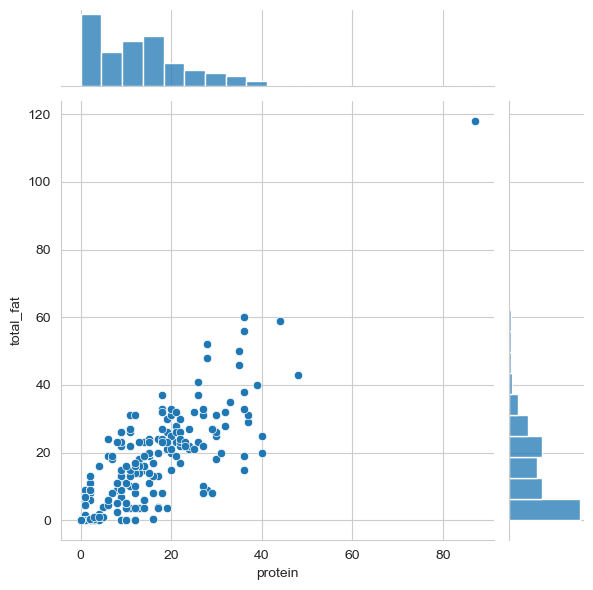

In [43]:
#with visualisations between total fat and protein
import matplotlib.pyplot as plt

import seaborn as sns

# Create a jointplot showing relationship between protein and total fat
plot = sns.jointplot(x="protein", y="total_fat", data=df)

# Show the plot using matplotlib (only needed in scripts or some IDEs)
plt.show()


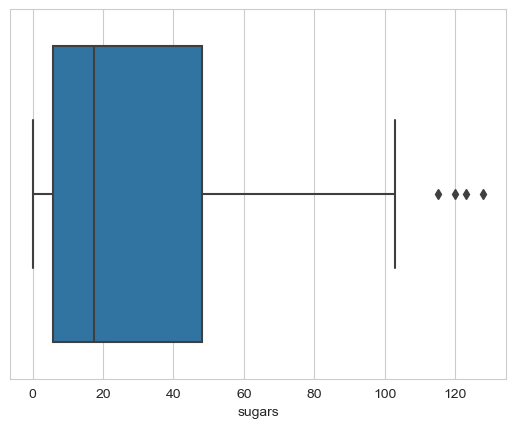

In [44]:
plot=sns.set_style("whitegrid")
ax=sns.boxplot(x=df["sugars"])
plt.show()

In [26]:
# Display basic statistics to understand distributions and ranges
df.describe()

,calories,calories_from_fat,total_fat,total_fat_(%_daily_value),saturated_fat,saturated_fat_(%_daily_value),trans_fat,cholesterol,cholesterol_(%_daily_value),sodium,...,carbohydrates,carbohydrates_(%_daily_value),dietary_fiber,dietary_fiber_(%_daily_value),sugars,protein,vitamin_a_(%_daily_value),vitamin_c_(%_daily_value),calcium_(%_daily_value),iron_(%_daily_value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


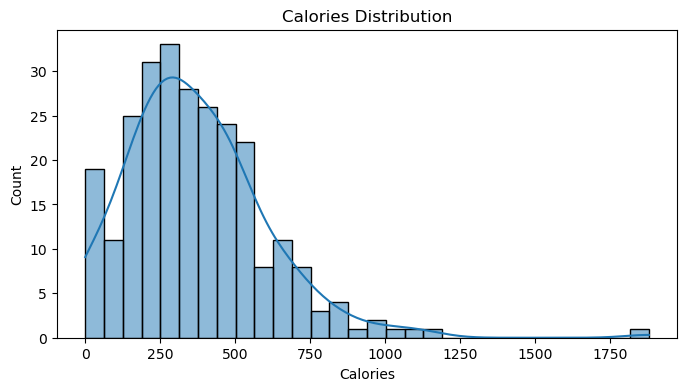

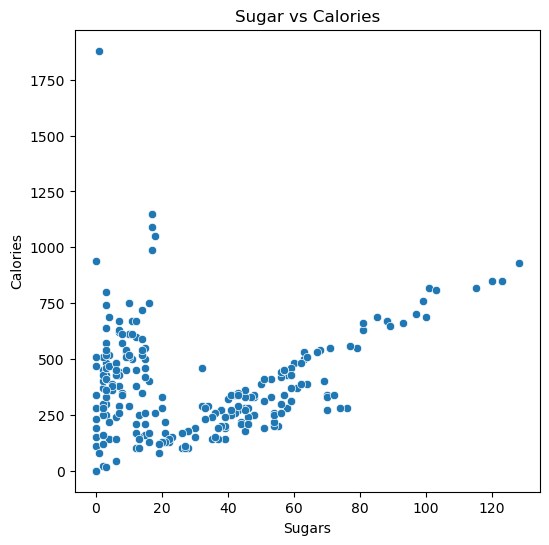

In [14]:
# Distribution of Calories
plt.figure(figsize=(8, 4))
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Calories Distribution')
plt.show()

# Sugar vs Calories
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='Sugars', y='Calories')
plt.title('Sugar vs Calories')
plt.show()

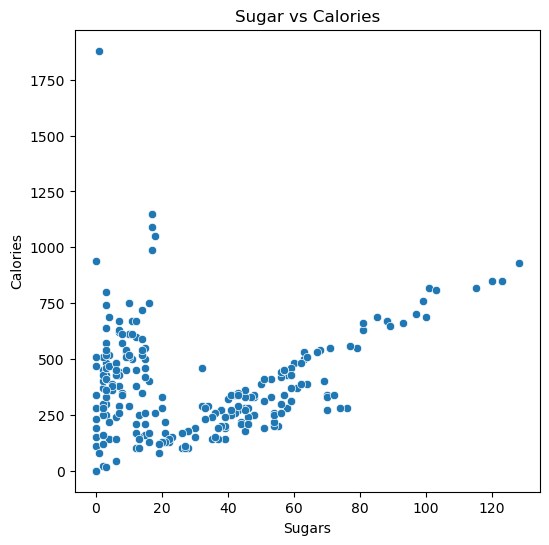

In [15]:
# Sugar vs Calories
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='Sugars', y='Calories')
plt.title('Sugar vs Calories')
plt.show()

<Figure size 1000x500 with 0 Axes>

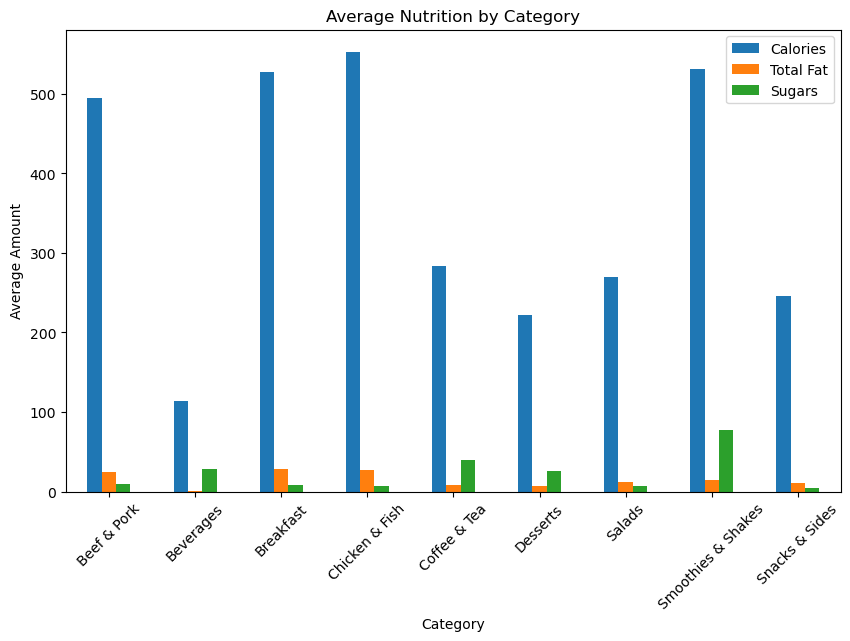

In [16]:
# Category-wise average
plt.figure(figsize=(10, 5))
grouped = df.groupby('Category')[['Calories', 'Total Fat', 'Sugars']].mean()
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Average Nutrition by Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.show()

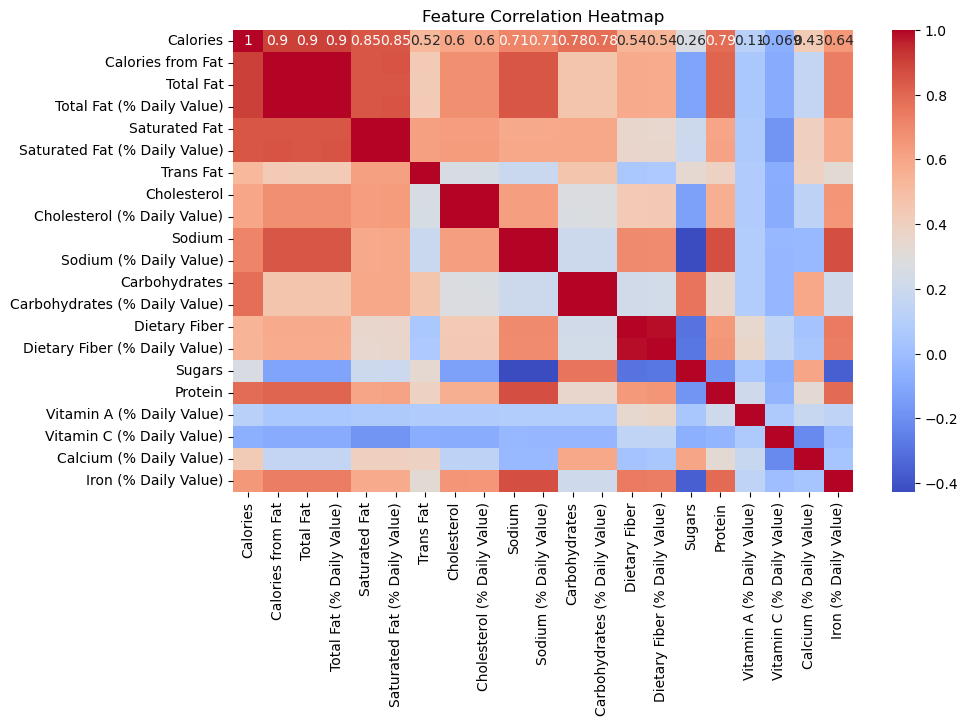

In [9]:
# Heatmap of Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Data Cleaning

In [58]:
#Check for missing values
df.isnull().sum()
#Check for duplicate values
df.duplicated().sum()
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [67]:
# Extract the number inside the parentheses (grams) and covert its data type to float
df['serving_size_g'] = df['serving_size'].str.extract(r'\((\d+)\s*g\)')[0].astype(float)
df.head()

,category,item,serving_size,calories,calories_from_fat,total_fat,total_fat_(%_daily_value),saturated_fat,saturated_fat_(%_daily_value),trans_fat,...,sugars,protein,vitamin_a_(%_daily_value),vitamin_c_(%_daily_value),calcium_(%_daily_value),iron_(%_daily_value),serving_size_g,calories_per_gram,sugar_to_fat_ratio,is_healthy
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,3,17,10,0,25,15,136.0,2.205882,0.214286,1
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,3,18,6,0,25,8,135.0,1.851852,0.333333,1
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,2,14,8,0,25,10,111.0,3.333333,0.083333,1
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,2,21,15,0,30,15,161.0,2.795031,0.068966,0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,2,21,6,0,25,10,161.0,2.484472,0.083333,0


In [68]:
# Add features
#creating a new column called calories_per_gram.

df['calories_per_gram'] = df['calories'] / df['serving_size_g']

#creating a new column called sugar_to_fat_ratio.
df['sugar_to_fat_ratio'] = df['sugars'] / (df['total_fat'] + 1)  # +1 to avoid division by 0

# Add healthy label
df['is_healthy'] = df['calories'].apply(lambda x: 1 if x < 400 else 0)


In [69]:
# Display basic statistics to understand distributions and ranges
df.describe()

,calories,calories_from_fat,total_fat,total_fat_(%_daily_value),saturated_fat,saturated_fat_(%_daily_value),trans_fat,cholesterol,cholesterol_(%_daily_value),sodium,...,sugars,protein,vitamin_a_(%_daily_value),vitamin_c_(%_daily_value),calcium_(%_daily_value),iron_(%_daily_value),serving_size_g,calories_per_gram,sugar_to_fat_ratio,is_healthy
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,118.000000,118.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615,204.313559,2.405031,8.120127,0.592308
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263,100.126219,0.739758,14.657211,0.492353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.229885,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000,143.000000,2.040710,0.267045,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000,183.500000,2.579646,2.812500,1.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000,254.000000,2.804021,4.830000,1.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000,646.000000,4.848485,76.000000,1.000000
